This notebook analyzes the commentedPool.json file to extract and analyze topics.

In [2]:
# Import required libraries
import json
import pandas as pd
from pathlib import Path
from tqdm import tqdm
import logging
import sys
import os

# Import all functions from the topic module
from src.analysis.topic import (
    read_json_in_chunks_with_ids,
    parse_topic_file,
    update_comments_with_clusters,
    analyze_cluster_distribution,
    analyze_user_clusters,
    calculate_user_sentiment_ratios,
    load_and_process_data,
    search_comments,
    display_search_results
)

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

In [3]:
# First, define your file paths
JSON_FILE = Path('2025.04.05 ToPeraicaLiska/commentedPool.json')
TOPICS_FILE = Path('2025.04.05 ToPeraicaLiska/Topics/topicEVOC_artClusterText_KeyBERT_0.txt')

# Use the load_and_process_data function to load and process everything
articles_df, comments_df = load_and_process_data(
    json_file_path=JSON_FILE,
    topic_file_path=TOPICS_FILE,
    max_entries=200000  # Adjust as needed
)

# Now you can run the analyze_cluster_distribution function
cluster_stats = analyze_cluster_distribution(comments_df)

# Display the statistics
total_comments = cluster_stats['total_comments']

print(f"\nCluster Assignment Statistics:")
print(f"Total comments: {total_comments}")
print(f"All comments have been assigned to clusters (including Unlabelled)")

print("\nDistribution of comments across clusters:")
for cluster_id, info in sorted(cluster_stats['clusters'].items()):
    label = info['label']
    count = info['count']
    percentage = info['percentage']
    print(f"Cluster {cluster_id} ({label}): {count} comments ({percentage:.2f}%)")

Reading JSON file: 0it [00:00, ?it/s]

Reading JSON file: 15517824it [00:08, 1779370.08it/s]
INFO:src.analysis.topic:Total number of articles: 10610
INFO:src.analysis.topic:Total number of comments: 348047



Cluster Assignment Statistics:
Total comments: 348047
All comments have been assigned to clusters (including Unlabelled)

Distribution of comments across clusters:
Cluster -1 (Unlabelled): 182243 comments (52.36%)
Cluster 0 (33 trumpovu mohl): 238 comments (0.07%)
Cluster 1 (29 papež náboženským): 62 comments (0.02%)
Cluster 2 (48 princezna svatby): 57 comments (0.02%)
Cluster 3 (37 jihokorejskému zatčením): 32 comments (0.01%)
Cluster 4 (38 severokorejští raket): 41 comments (0.01%)
Cluster 5 (64 putinovo rusům): 592 comments (0.17%)
Cluster 6 (34 požárům kalifornie): 12 comments (0.00%)
Cluster 7 (34 nevidomí nepozornosti): 175 comments (0.05%)
Cluster 9 (23 aerolinkách cathay): 55 comments (0.02%)
Cluster 10 (26 konzole videohry): 46 comments (0.01%)
Cluster 11 (103 ghostrunneru maskotem): 208 comments (0.06%)
Cluster 12 (38 pražském letadel): 557 comments (0.16%)
Cluster 13 (93 brazílii miliardářkou): 4390 comments (1.26%)
Cluster 14 (21 demonstranti propalestinské): 3 comments (0

In [4]:
# Use the analyze_user_clusters function to analyze which clusters each user posts to
user_cluster_df, statistics = analyze_user_clusters(comments_df)

# Display statistics
print(f"Total number of users: {statistics['total_users']}")
print("\nDistribution of users by number of clusters they post to:")
for cluster_count, info in sorted(statistics['distribution'].items()):
    print(f"Users posting to {cluster_count} different clusters: {info['num_users']} ({info['percentage']:.2f}%)")

# Show top users who post to the most clusters
print("\nTop 10 users who post to the most different clusters:")
for user in statistics['top_users']:
    print(f"User: {user['author']}")
    print(f"  Posts to {user['unique_clusters']} different clusters")
    print(f"  Total comments: {user['comment_count']}")
    
    # Display the top clusters
    cluster_count = len(user['top_clusters'])
    total_clusters = user['unique_clusters']
    
    if cluster_count < total_clusters:
        print(f"  Top {cluster_count} clusters (out of {total_clusters}):")
    else:
        print(f"  Clusters:")
    
    for cluster in user['top_clusters']:
        print(f"    - Cluster {cluster['cluster_id']}: {cluster['label']}")
    print()

Total number of users: 47657

Distribution of users by number of clusters they post to:
Users posting to 1 different clusters: 22163 (46.51%)
Users posting to 2 different clusters: 8240 (17.29%)
Users posting to 3 different clusters: 4623 (9.70%)
Users posting to 4 different clusters: 2962 (6.22%)
Users posting to 5 different clusters: 1990 (4.18%)
Users posting to 6 different clusters: 1501 (3.15%)
Users posting to 7 different clusters: 1138 (2.39%)
Users posting to 8 different clusters: 846 (1.78%)
Users posting to 9 different clusters: 671 (1.41%)
Users posting to 10 different clusters: 520 (1.09%)
Users posting to 11 different clusters: 469 (0.98%)
Users posting to 12 different clusters: 330 (0.69%)
Users posting to 13 different clusters: 328 (0.69%)
Users posting to 14 different clusters: 251 (0.53%)
Users posting to 15 different clusters: 245 (0.51%)
Users posting to 16 different clusters: 207 (0.43%)
Users posting to 17 different clusters: 138 (0.29%)
Users posting to 18 differe

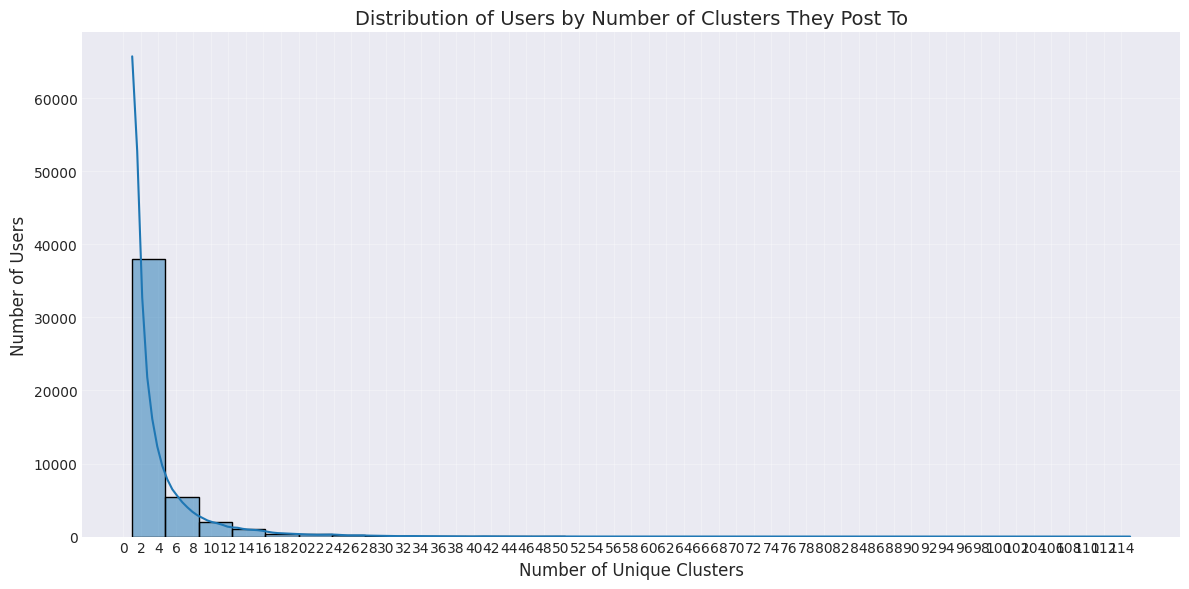

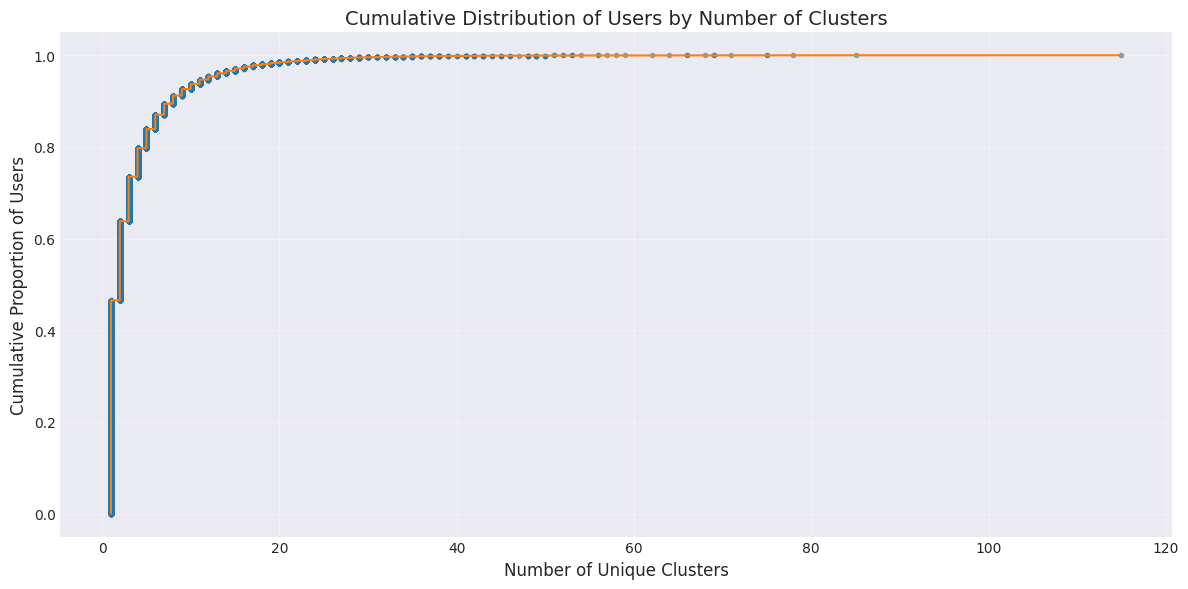

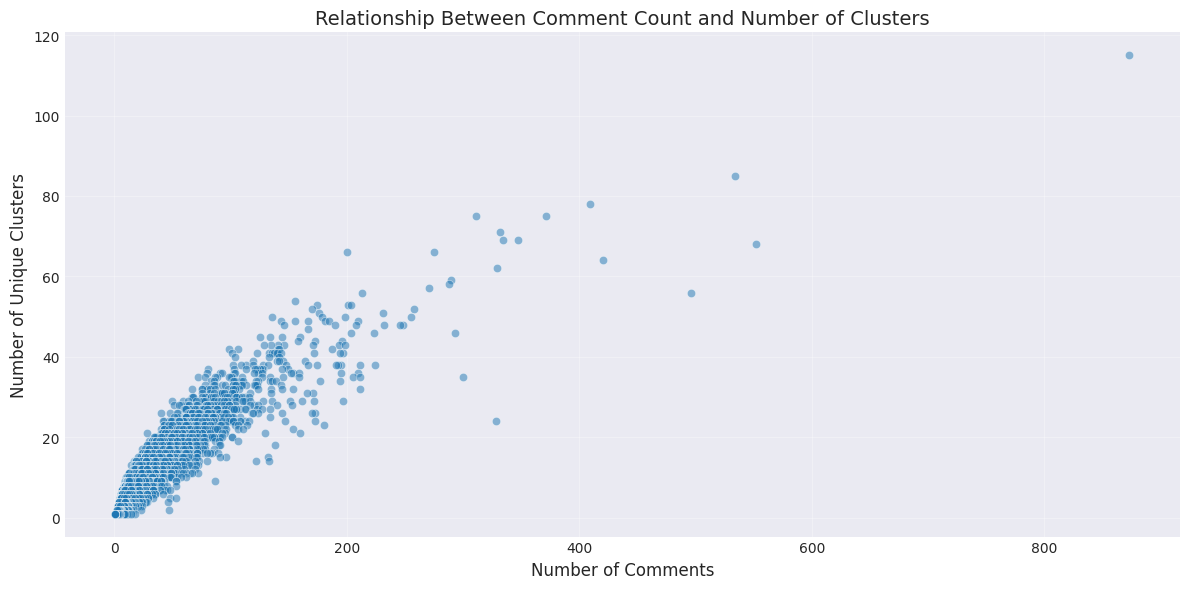

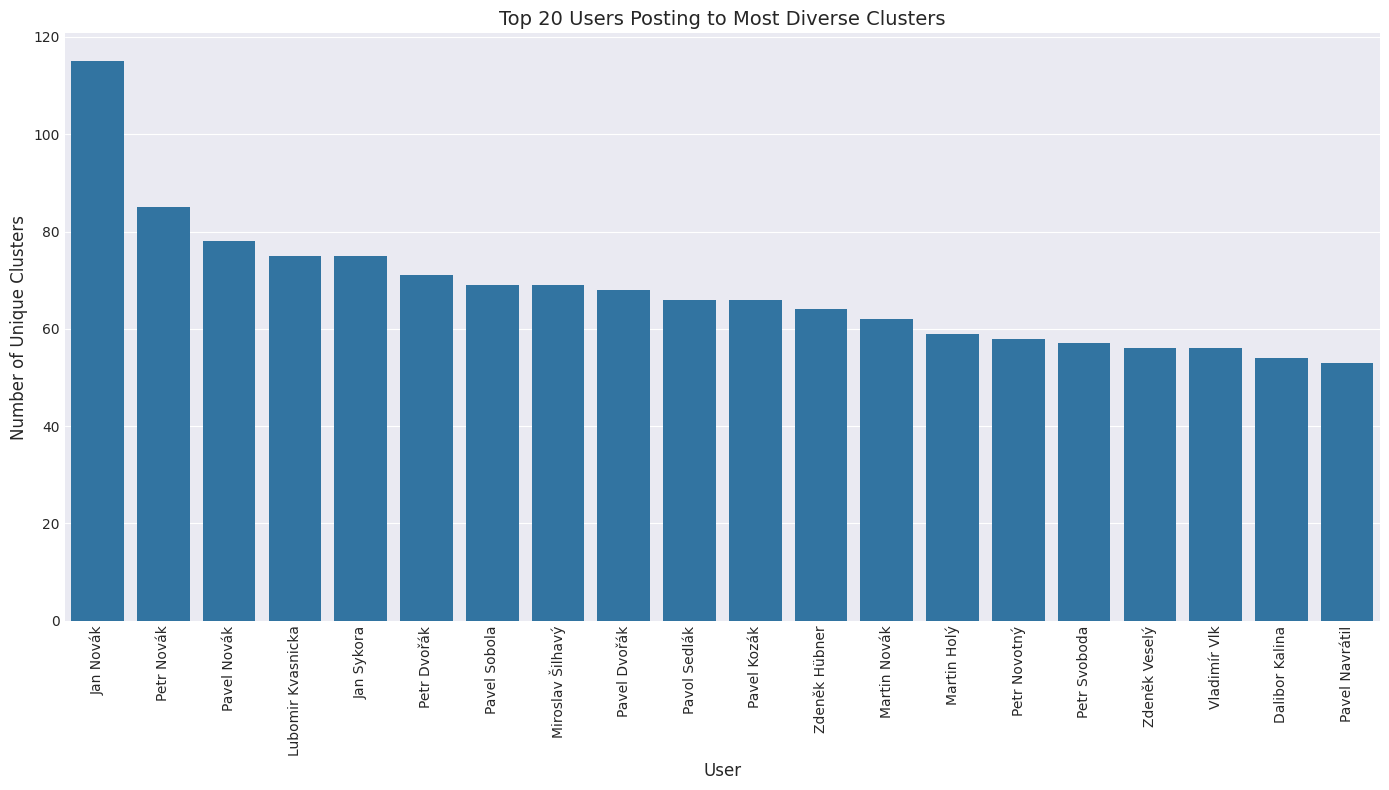

Summary Statistics for Unique Clusters per User:
count    47657.000000
mean         3.408712
std          4.716214
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        115.000000
Name: unique_clusters, dtype: float64

Percentage of users by number of clusters:
1 clusters: 46.51%
2 clusters: 17.29%
3 clusters: 9.70%
4 clusters: 6.22%
5 clusters: 4.18%
6 clusters: 3.15%
7 clusters: 2.39%
8 clusters: 1.78%
9 clusters: 1.41%
10 clusters: 1.09%
11 clusters: 0.98%
12 clusters: 0.69%
13 clusters: 0.69%
14 clusters: 0.53%
15 clusters: 0.51%
16 clusters: 0.43%
17 clusters: 0.29%
18 clusters: 0.25%
19 clusters: 0.24%
20 clusters: 0.18%
21 clusters: 0.16%
22 clusters: 0.14%
23 clusters: 0.14%
24 clusters: 0.17%
25 clusters: 0.10%
26 clusters: 0.09%
27 clusters: 0.11%
28 clusters: 0.07%
29 clusters: 0.07%
30 clusters: 0.04%
31 clusters: 0.03%
32 clusters: 0.04%
33 clusters: 0.04%
34 clusters: 0.03%
35 clusters: 0.03%
36 clusters: 0.03%
37 clusters: 0.0

In [5]:
# Import visualization libraries if not already imported
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style for the plots
plt.style.use('seaborn-v0_8-darkgrid')

# Figure 1: Distribution of users by number of clusters
plt.figure(figsize=(12, 6))
sns.histplot(data=user_cluster_df, x='unique_clusters', kde=True, bins=30)
plt.title('Distribution of Users by Number of Clusters They Post To', fontsize=14)
plt.xlabel('Number of Unique Clusters', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.xticks(range(0, max(user_cluster_df['unique_clusters'])+1, 2))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Figure 2: Cumulative distribution function (CDF)
plt.figure(figsize=(12, 6))
# Sort values for CDF
sorted_values = np.sort(user_cluster_df['unique_clusters'].values)
# Get y values for CDF
yvals = np.arange(1, len(sorted_values)+1) / float(len(sorted_values))
# Plot CDF
plt.plot(sorted_values, yvals, marker='.', linestyle='none', alpha=0.5)
plt.plot(sorted_values, yvals, linestyle='-')
plt.title('Cumulative Distribution of Users by Number of Clusters', fontsize=14)
plt.xlabel('Number of Unique Clusters', fontsize=12)
plt.ylabel('Cumulative Proportion of Users', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Figure 3: Scatter plot of unique clusters vs. comment count
plt.figure(figsize=(12, 6))
plt.scatter(user_cluster_df['comment_count'], user_cluster_df['unique_clusters'], 
            alpha=0.5, edgecolor='w', linewidth=0.5)
plt.title('Relationship Between Comment Count and Number of Clusters', fontsize=14)
plt.xlabel('Number of Comments', fontsize=12)
plt.ylabel('Number of Unique Clusters', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Figure 4: Top 20 users with most diverse posting patterns
top_20_users = user_cluster_df.head(20)
plt.figure(figsize=(14, 8))
sns.barplot(data=top_20_users, x='author', y='unique_clusters')
plt.title('Top 20 Users Posting to Most Diverse Clusters', fontsize=14)
plt.xlabel('User', fontsize=12)
plt.ylabel('Number of Unique Clusters', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Print summary statistics
print("Summary Statistics for Unique Clusters per User:")
print(user_cluster_df['unique_clusters'].describe())

# Compute percentage of users by cluster count
cluster_counts = user_cluster_df['unique_clusters'].value_counts(normalize=True).sort_index() * 100
print("\nPercentage of users by number of clusters:")
for clusters, percentage in cluster_counts.items():
    print(f"{clusters} clusters: {percentage:.2f}%")

INFO:datasets:PyTorch version 2.6.0 available.


Loading user_anomaly_scores.csv...
Loading user_anomaly_scores_lof.csv...

File 1 - user_anomaly_scores.csv:
Shape: (9786, 3)
Columns: ['author', 'anomaly_score_iforest', 'anomaly_score_lof']
              author  anomaly_score_iforest  anomaly_score_lof
0   Vladimír Kalinay               0.254494           1.286895
1        Jan Jiříček               0.249950           1.063876
2  Radoslav Nešpůrek               0.248959           1.133372

File 2 - user_anomaly_scores_lof.csv:
Shape: (9786, 3)
Columns: ['author', 'anomaly_score_iforest', 'anomaly_score_lof']
             author  anomaly_score_iforest  anomaly_score_lof
0  František Osvald               0.185707           1.835765
1    Michael Budera               0.113703           1.710030
2   Inka Vavrečková               0.087464           1.679696

Using columns: author, anomaly_score_iforest from file 1
Using columns: author, anomaly_score_iforest from file 2

Top 20 users by number of clusters with their anomaly scores:
        

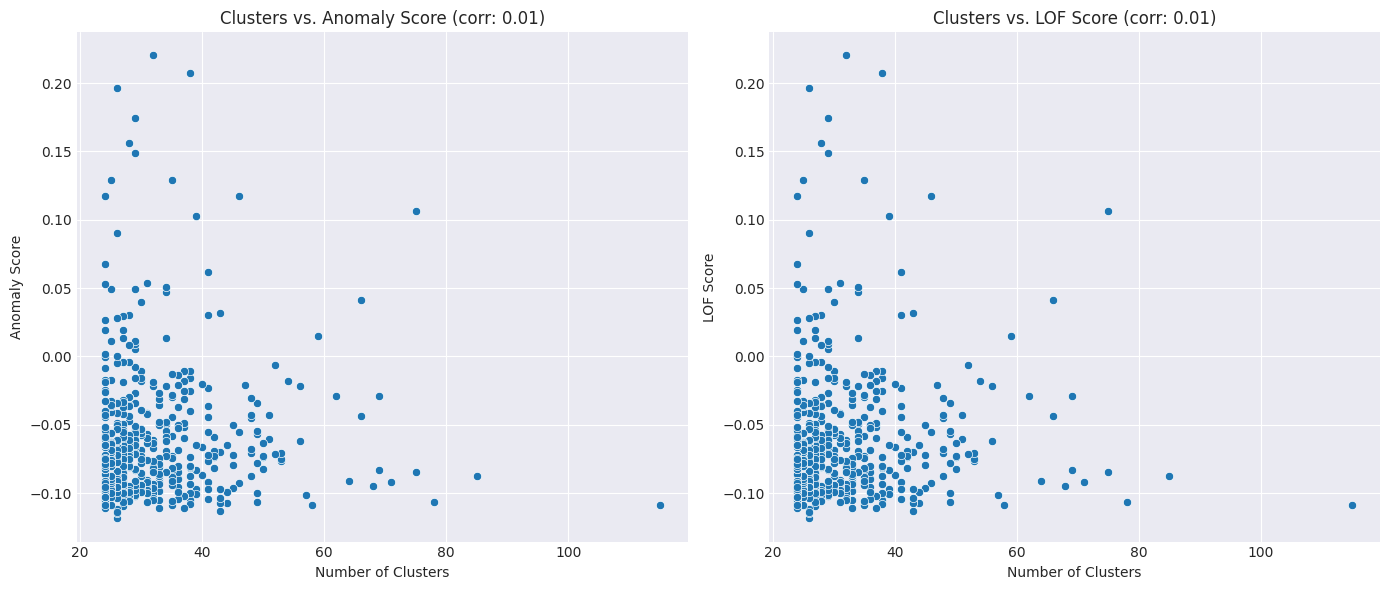

In [6]:
# Load anomaly scores for top cluster-posting users from exact paths
import pandas as pd
from pathlib import Path
import sys

# Add the parent directory to path to import TrollPredictor
sys.path.append("/home/luuka/thesis/workspace")
from src.models.predictor import TrollPredictor

# Define paths to the specific files
anomaly_file1 = Path("/home/luuka/thesis/workspace/user_anomaly_scores.csv")
anomaly_file2 = Path("/home/luuka/thesis/workspace/user_anomaly_scores_lof.csv")

# Load the files
print(f"Loading {anomaly_file1.name}...")
scores_df1 = pd.read_csv(anomaly_file1)
print(f"Loading {anomaly_file2.name}...")
scores_df2 = pd.read_csv(anomaly_file2)

# Display basic info about the loaded files
print(f"\nFile 1 - {anomaly_file1.name}:")
print(f"Shape: {scores_df1.shape}")
print(f"Columns: {scores_df1.columns.tolist()}")
print(scores_df1.head(3))

print(f"\nFile 2 - {anomaly_file2.name}:")
print(f"Shape: {scores_df2.shape}")
print(f"Columns: {scores_df2.columns.tolist()}")
print(scores_df2.head(3))

# Determine the username column in each file based on column names
username_col1 = next((col for col in scores_df1.columns if 'user' in col.lower() or 'author' in col.lower()), scores_df1.columns[0])
username_col2 = next((col for col in scores_df2.columns if 'user' in col.lower() or 'author' in col.lower()), scores_df2.columns[0])

# Determine score column in each file
score_col1 = next((col for col in scores_df1.columns if 'score' in col.lower() or 'anomaly' in col.lower()), scores_df1.columns[1])
score_col2 = next((col for col in scores_df2.columns if 'score' in col.lower() or 'anomaly' in col.lower() or 'lof' in col.lower()), scores_df2.columns[1])

print(f"\nUsing columns: {username_col1}, {score_col1} from file 1")
print(f"Using columns: {username_col2}, {score_col2} from file 2")

# Get top 20 users from user_cluster_df (created in previous code)
top_users = user_cluster_df.head(500)['author'].tolist()

# Create a result DataFrame
result_df = pd.DataFrame({'user': top_users})
result_df['num_clusters'] = [user_cluster_df[user_cluster_df['author'] == user]['unique_clusters'].values[0] for user in top_users]

# Add scores from the files
scores_dict1 = dict(zip(scores_df1[username_col1], scores_df1[score_col1]))
result_df['anomaly_score'] = result_df['user'].map(lambda x: scores_dict1.get(x, None))

scores_dict2 = dict(zip(scores_df2[username_col2], scores_df2[score_col2]))
result_df['lof_score'] = result_df['user'].map(lambda x: scores_dict2.get(x, None))

# Display results
print("\nTop 20 users by number of clusters with their anomaly scores:")
pd.set_option('display.max_columns', None)
print(result_df)

# Calculate correlation between number of clusters and scores
corr1 = result_df['num_clusters'].corr(result_df['anomaly_score'].fillna(0))
print(f"\nCorrelation between num_clusters and anomaly_score: {corr1:.4f}")

corr2 = result_df['num_clusters'].corr(result_df['lof_score'].fillna(0))
print(f"Correlation between num_clusters and lof_score: {corr2:.4f}")

# Create a scatter plot to visualize the relationship
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Plot 1: Anomaly Score
plt.subplot(1, 2, 1)
sns.scatterplot(data=result_df, x='num_clusters', y='anomaly_score')
plt.title(f'Clusters vs. Anomaly Score (corr: {corr1:.2f})')
plt.xlabel('Number of Clusters')
plt.ylabel('Anomaly Score')

# Plot 2: LOF Score
plt.subplot(1, 2, 2)
sns.scatterplot(data=result_df, x='num_clusters', y='lof_score')
plt.title(f'Clusters vs. LOF Score (corr: {corr2:.2f})')
plt.xlabel('Number of Clusters')
plt.ylabel('LOF Score')

plt.tight_layout()
plt.show()

In [7]:
from src.models.predictor import TrollPredictor

# Initialize predictor with model
model_path = "./checkpoints/finetuned_model.pt"

# Initialize predictor with threshold
predictor_finetuned = TrollPredictor(
    model_path=model_path,
    comments_per_user=10,
    max_length=96,
    threshold=0.4  # Add threshold parameter
)

INFO:src.models.predictor:Loaded model weights from ./checkpoints/finetuned_model.pt



Loaded prediction summary:
Total authors analyzed: 8275
Mean trolliness score: 0.191
Median trolliness score: 0.155
Standard deviation: 0.129
Percentage classified as trolls: 3.2%
Mean prediction confidence: 0.629
Threshold used: 0.4


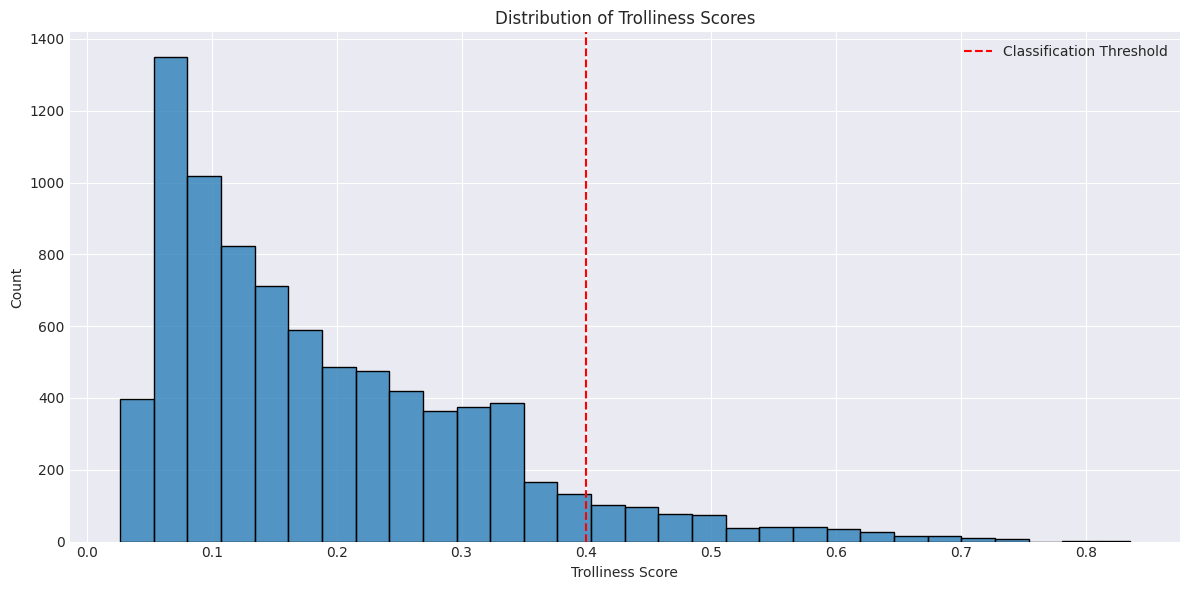

In [13]:
# Load previously saved prediction results
predictions_df = pd.read_csv(Path('output') / 'czech_media_predictions_finetuned.csv')

print("\nLoaded prediction summary:")
print(f"Total authors analyzed: {len(predictions_df)}")
print(f"Mean trolliness score: {predictions_df['trolliness_score'].mean():.3f}")
print(f"Median trolliness score: {predictions_df['trolliness_score'].median():.3f}")
print(f"Standard deviation: {predictions_df['trolliness_score'].std():.3f}")
print(f"Percentage classified as trolls: {(predictions_df['binary_prediction'] == 'troll').mean() * 100:.1f}%")
print(f"Mean prediction confidence: {predictions_df['binary_confidence'].mean():.3f}")
print(f"Threshold used: {predictor_finetuned.threshold}")

# Create visualization of the distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=predictions_df['trolliness_score'], bins=30)
plt.title('Distribution of Trolliness Scores')
plt.xlabel('Trolliness Score')
plt.ylabel('Count')
plt.axvline(x=predictor_finetuned.threshold, color='r', linestyle='--', label='Classification Threshold')
plt.legend()
plt.tight_layout()
plt.show()


Analyzing 8129 users that appear in both datasets


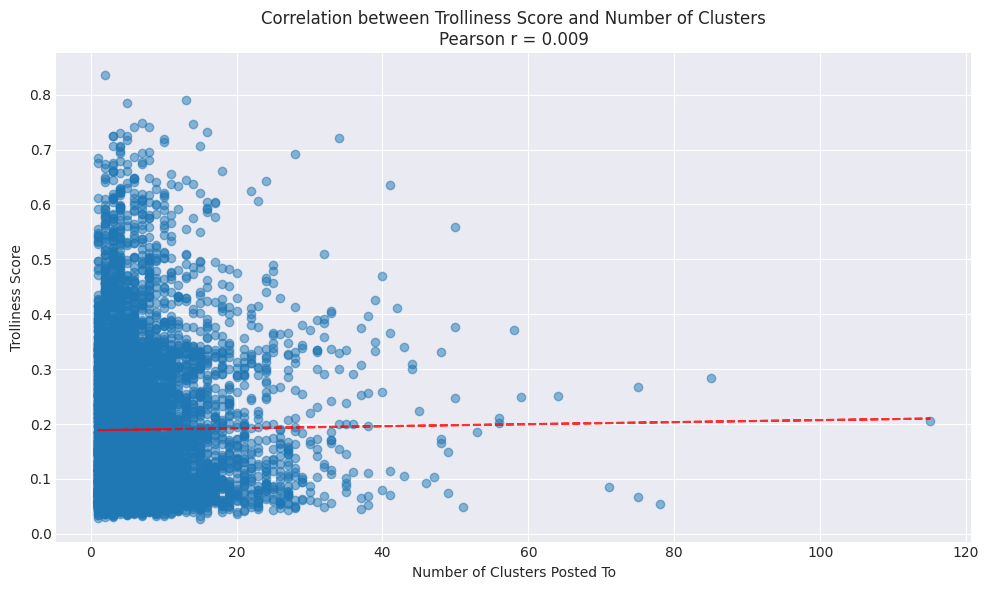

In [23]:
# Calculate number of clusters per user
user_cluster_counts = comments_df.groupby('author')['cluster_id'].nunique()

# Get intersection of users between predictions and comments
common_users = set(predictions_df['author']).intersection(set(user_cluster_counts.index))

# Filter both DataFrames to only include common users
predictions_filtered = predictions_df[predictions_df['author'].isin(common_users)]
user_cluster_counts_filtered = user_cluster_counts[list(common_users)]

# Create DataFrame with trolliness scores and cluster counts
correlation_df = pd.DataFrame({
    'trolliness_score': predictions_filtered['trolliness_score'],
    'num_clusters': user_cluster_counts_filtered.values
})

# Calculate correlation
correlation = correlation_df['trolliness_score'].corr(correlation_df['num_clusters'])

print(f"\nAnalyzing {len(common_users)} users that appear in both datasets")

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(correlation_df['num_clusters'], correlation_df['trolliness_score'], alpha=0.5)
plt.xlabel('Number of Clusters Posted To')
plt.ylabel('Trolliness Score') 
plt.title(f'Correlation between Trolliness Score and Number of Clusters\nPearson r = {correlation:.3f}')

# Add trend line
z = np.polyfit(correlation_df['num_clusters'], correlation_df['trolliness_score'], 1)
p = np.poly1d(z)
plt.plot(correlation_df['num_clusters'], p(correlation_df['num_clusters']), "r--", alpha=0.8)

plt.tight_layout()
plt.show()


In [24]:
username = "Pavel Sedlák"  # Replace with the username you want to analyze
sentiment_ratios = get_user_sentiment_ratios(comments_df, username)
print(f"Sentiment ratios for {username}:")
print(f"Negative: {sentiment_ratios['negative_ratio']:.2f} ({sentiment_ratios['counts']['negative']} comments)")
print(f"Positive: {sentiment_ratios['positive_ratio']:.2f} ({sentiment_ratios['counts']['positive']} comments)")
print(f"Ambivalent: {sentiment_ratios['ambivalent_ratio']:.2f} ({sentiment_ratios['counts']['ambivalent']} comments)")


Sentiment ratios for Pavel Sedlák:
Negative: 0.50 (5 comments)
Positive: 0.20 (2 comments)
Ambivalent: 0.10 (1 comments)


In [16]:
# Step 1: Calculate number of clusters for ALL users
def calculate_clusters_per_user(comments_df):
    """
    Calculate the number of unique clusters (topics) each user posts to
    """
    # Check if 'cluster' or 'topic' column exists in comments_df
    cluster_column = None
    if 'cluster' in comments_df.columns:
        cluster_column = 'cluster'
    elif 'topic' in comments_df.columns:
        cluster_column = 'topic'
    else:
        raise ValueError("No 'cluster' or 'topic' column found in comments_df")
    
    # Count unique clusters per user
    user_clusters = comments_df.groupby('author')[cluster_column].nunique().reset_index()
    user_clusters.columns = ['user', 'num_clusters']
    
    print(f"Calculated number of clusters for {len(user_clusters)} users")
    return user_clusters

In [32]:
def calculate_all_user_sentiment_ratios(comments_df, max_users=2000):
    # Get unique users
    users = comments_df['author'].unique()[:max_users]  # Limit number of users
    
    # Initialize results dictionary
    results = {
        'author': [],
        'negative_ratio': [],
        'positive_ratio': [],
        'ambivalent_ratio': [], 
        'neutral_ratio': [],
        'comment_count': []
    }
    
    # Calculate sentiment ratios for each user
    for user in users:
        user_comments = comments_df[comments_df['author'] == user]
        
        if len(user_comments) == 0:
            continue
        
        # Extract sentiment values
        sentiments = []
        for attrs in user_comments['attributes']:
            if isinstance(attrs, dict) and 'sentiment' in attrs:
                sentiments.append(attrs['sentiment'])
        
        total_comments = len(sentiments)
        if total_comments == 0:
            continue
            
        negative_count = sentiments.count('Negative')
        positive_count = sentiments.count('Positive')
        ambivalent_count = sentiments.count('Ambivalent')
        neutral_count = sentiments.count('Neutral')
        
        # Add to results
        results['author'].append(user)
        results['negative_ratio'].append(negative_count / total_comments)
        results['positive_ratio'].append(positive_count / total_comments)
        results['ambivalent_ratio'].append(ambivalent_count / total_comments)
        results['neutral_ratio'].append(neutral_count / total_comments)
        results['comment_count'].append(total_comments)
    
    # Convert to DataFrame
    return pd.DataFrame(results)


Correlations between trolliness_score and sentiment ratios:
Negative: 0.138
Positive: 0.109
Ambivalent: 0.035
Neutral: -0.225


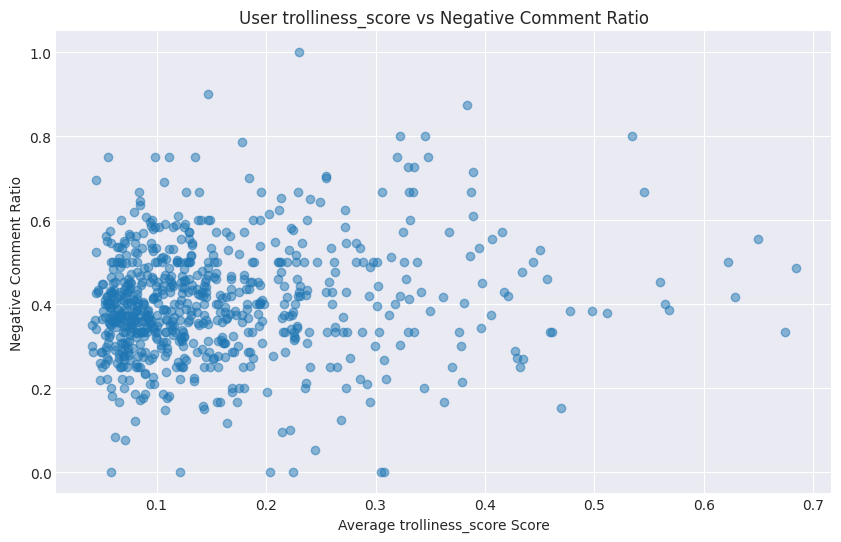

In [33]:
# Calculate sentiment ratios for all users
user_sentiment_ratios = calculate_all_user_sentiment_ratios(comments_df)

# Get trolliness_score scores from predictions
user_trolliness_score = predictions_df.groupby('author')['trolliness_score'].mean().reset_index()

# Merge sentiment ratios with trolliness_score scores
user_analysis = pd.merge(user_sentiment_ratios, user_trolliness_score, on='author', how='inner')

# Calculate correlations between trolliness_score and sentiment ratios
correlations = {
    'Negative': user_analysis['trolliness_score'].corr(user_analysis['negative_ratio']),
    'Positive': user_analysis['trolliness_score'].corr(user_analysis['positive_ratio']), 
    'Ambivalent': user_analysis['trolliness_score'].corr(user_analysis['ambivalent_ratio']),
    'Neutral': user_analysis['trolliness_score'].corr(user_analysis['neutral_ratio'])
}

# Print correlations
print("\nCorrelations between trolliness_score and sentiment ratios:")
for sentiment, corr in correlations.items():
    print(f"{sentiment}: {corr:.3f}")

# Create scatter plot of trolliness_score vs negative ratio
plt.figure(figsize=(10,6))
plt.scatter(user_analysis['trolliness_score'], user_analysis['negative_ratio'], alpha=0.5)
plt.xlabel('Average trolliness_score Score')
plt.ylabel('Negative Comment Ratio')
plt.title('User trolliness_score vs Negative Comment Ratio')
plt.show()


In [34]:
# Search for comments containing "troll"
matches = search_comments(comments_df, articles_df, "troll")

# Display the results
display_search_results(matches)

Searching for comments containing 'troll'...
Checking 348047 out of 348047 total comments


  0%|          | 0/348047 [00:00<?, ?it/s]

Found 66 comments containing 'troll'

--- Comment 1 ---
Author: Jan Trejbal
Cluster: 189 (31 dronů ruská)
Article: Jeden z největších dronových útoků na Rusko....
Content:
Dobrý den. V první větě chci napsat, že napadený stát má jednoznačně právo se
bránit všemi dostupnými prostředky. Aby to snad nějaký troll špatně nepochopil.
Vrtá mi však hlavou, jak může stejná Evropská unie, chcete-li EK, na straně
jedné šikanovat evropský průmysl, výrobce aut a spotřebitele, za každý gram CO²
a na straně druhé podporovat válku na Ukrajině, která produkuje tak obrovské
emise a znečištění, které dnešní čistá Evropa nedokáže vyprodukovat za 100 let.
To číslo jsem si vymyslel, žádná studie na to nikdy nevznikne, ale stačí se
podívat na záběry z konfliktu a musí být každému jasné, že se to nedá
porovnávat. Kde jsou tedy ti progresivní levičáci, co křičí, že uhoříme, pokud
si nezničíme vlastní hospodářství? Proč nekřičí, "zastavte tuto válku, ničí naši
planetu"? Na tomto příkladu je vidět, že klimatický